Input Occupancy Level: 64.46
Input Time of Day: 0.55
Parking Availability: 49.02%
------------------------------
Input Occupancy Level: 79.00
Input Time of Day: 0.87
Parking Availability: 48.46%
------------------------------
Input Occupancy Level: 76.37
Input Time of Day: 0.96
Parking Availability: 48.30%
------------------------------
Input Occupancy Level: 90.01
Input Time of Day: 0.82
Parking Availability: 48.55%
------------------------------
Input Occupancy Level: 20.22
Input Time of Day: 0.96
Parking Availability: 51.70%
------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


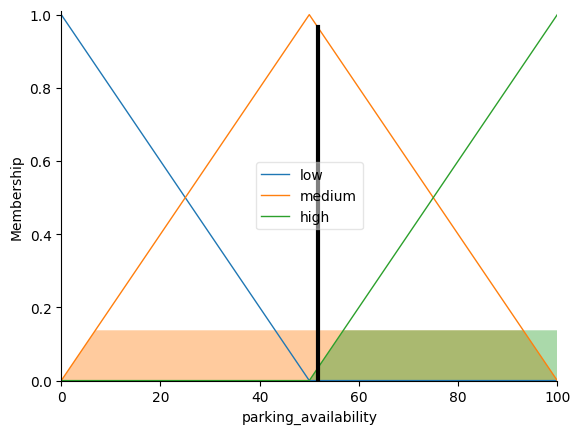

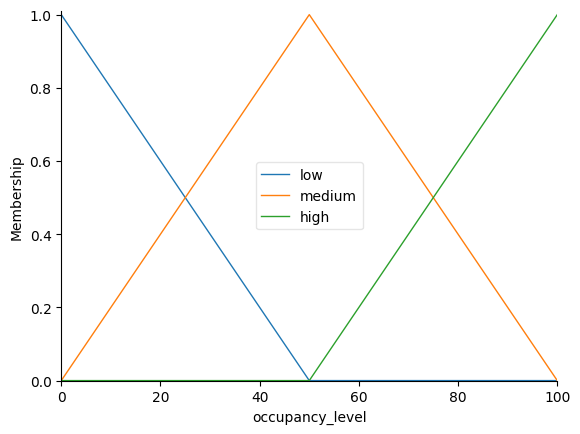

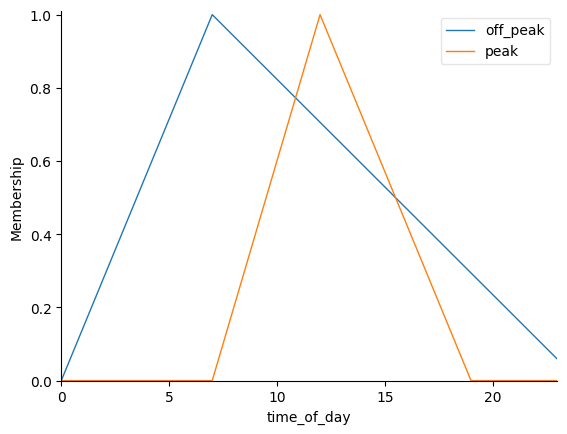

In [1]:
# Import necessary libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Define fuzzy system
occupancy_level = ctrl.Antecedent(np.arange(0, 101, 1), 'occupancy_level')
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')
parking_availability = ctrl.Consequent(np.arange(0, 101, 1), 'parking_availability')


# Define membership functions
occupancy_level['low'] = fuzz.trimf(occupancy_level.universe, [0, 0, 50])
occupancy_level['medium'] = fuzz.trimf(occupancy_level.universe, [0, 50, 100])
occupancy_level['high'] = fuzz.trimf(occupancy_level.universe, [50, 100, 100])


time_of_day['off_peak'] = fuzz.trimf(time_of_day.universe, [0, 7, 24])
time_of_day['peak'] = fuzz.trimf(time_of_day.universe, [7, 12, 19])



parking_availability['low'] = fuzz.trimf(parking_availability.universe, [0, 0, 50])
parking_availability['medium'] = fuzz.trimf(parking_availability.universe, [0, 50, 100])
parking_availability['high'] = fuzz.trimf(parking_availability.universe, [50, 100, 100])


# Define fuzzy rules
rule1 = ctrl.Rule(occupancy_level['low'] & time_of_day['off_peak'], parking_availability['high'])
rule2 = ctrl.Rule(occupancy_level['medium'] & time_of_day['off_peak'], parking_availability['medium'])
rule3 = ctrl.Rule(occupancy_level['high'] & time_of_day['off_peak'], parking_availability['low'])



# Create control system
parking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
parking_sim = ctrl.ControlSystemSimulation(parking_ctrl)



# Set random input values
input_occupancy = np.random.uniform(0, 100)
input_time_of_day = np.random.uniform(0, 24)
parking_sim.input['occupancy_level'] = input_occupancy
parking_sim.input['time_of_day'] = input_time_of_day



# Compute the result
parking_sim.compute()
result = parking_sim.output['parking_availability']


# For loop on time
for i in range(5):
    # create a new Simulator 
    parking_sim = ctrl.ControlSystemSimulation(parking_ctrl)
    
    # set random input value 
    input_occupancy = np.random.uniform(0,100)
    input_time_of_day = np.random.uniform(0.24)
    
    parking_sim.input['occupancy_level' ] = input_occupancy
    parking_sim.input['time_of_day'] = input_time_of_day
    
    
    # Compute the result 
    parking_sim.compute()
    result =parking_sim.output['parking_availability']
    
    # Display the result as a percentage
    percentage_result = result / 100.0  # assuming the result is on a 0-100 scale
    print(f"Input Occupancy Level: {input_occupancy:.2f}")
    print(f"Input Time of Day: {input_time_of_day:.2f}")
    print("Parking Availability: {:.2%}".format(percentage_result))
    print("-" * 30)


# Plot the fuzzy membership functions and the result
parking_availability.view(sim=parking_sim)
occupancy_level.view()
time_of_day.view()

plt.show()
